# Weather Wizard

## Introduzione

La quantità di dati che ad oggi circolano in rete è molto considerevole e gli utenti web, al giorno d’oggi, 
sono sempre più esigenti e premurosi di ottenere sempre più informazioni in maniera istantanea.Il progetto WeatherWizard rappresenta un'innovativa soluzione basata su diverse tecnologie e framework, concepita per la definizione di una pipeline dedicata al trattamento di dati provenienti da sorgenti eterogenee in tempo reale.


Nel contesto meteorologico, la capacità di analisi, elaborazione e interpretazione dei dati in tempo reale è diventato sempre più comune,
tant’è che al giorno d’oggi esistono numerosi servizi capaci di effettuare previsioni meteo.

sono sempre più esigenti e premurosi di ottenere sempre più informazioni in maniera istantanea.Il progetto WeatherWizard rappresenta un'innovativa soluzione basata su diverse tecnologie e framework, concepita per la definizione di una pipeline dedicata al trattamento di dati provenienti da sorgenti eterogenee in tempo reale.


Nel contesto meteorologico, la capacità di analisi, elaborazione e interpretazione dei dati in tempo reale è diventato sempre più comune,
tant’è che al giorno d’oggi esistono numerosi servizi capaci di effettuare previsioni meteo.

## Scopo del progetto
L’obiettivo principale del progetto WeatherWizard è quello di affrontare tale sfida, creando una pipeline di tecnologie molto recenti, in grado di acquisire, archiviare, analizzare, elaborare e visualizzare i dati in tempo reale di tre importanti città italiane: Catania, Roma e Milano. 

## Problema da risolvere

Il problema che si intende affrontare è quello di riuscire a gestire una mole di dati provenienti da 3 API internet meteorologiche. 
La gestione e l’analisi di queste informazioni risulta essere una sfida complessa per via dei possibili problemi legati a scalabilità, tempi di risposta lenti e difficoltà di mapping dei dati eterogenei.

## Tecnologie Utilizzate

Nella realizzazione del progetto WeatherWizard sono state utilizzate diverse tecnologie mirate per garantire un’efficace gestione e analisi dei dati.
Di seguito viene fornita una panoramica dello stack tecnologico utilizzato e il perchè si preferisce la singola tecnologia a un eventuale alternativa:

- **Docker**: Docker è stato scelto per la creazione dei container, garantendo un ambiente di sviluppo indipendente dal sistema operativo e di conseguenza portatile.

- **Spring Boot**: Spring Boot è un framework molto utilizzato per lo sviluppo di applicazioni in Java.
L’utilizzo di questo framework in Weather Wizard ha permesso la creazione di microservizi scalabili e modulabili per la comunicazione con le altre tecnologie presenti nel progetto.
*L’uso di questo framework ha prevalso rispetto ad altre alternative per la sua facilità di integrazione che lo rende ideale per lo sviluppo dei microservizi.*

- **Fluentd**: Fluentd è stato scelto per la raccolta e l’aggregazione dei log.
All’interno del progetto WeatherWizard svolge il ruolo fondamentale di ricezione e invio dei dati tra i microservizi di SpringBoot e i topic Kafka.
*La scelta verso questa tecnologia si è sviluppata grazie alla sua capacità di gestione dei dati in tempo reale e alla grande quantità di plugin disponibili che rendono più modulabile il progetto finale.*

- **Kafka Stream**: Implementato come dipendenza di un microservizio Spring Boot, gestisce le informazioni dai topic Kafka in tempo reale.

- **Apache Spark**: Come per Kafka Stream, anche Apache Spark è stato utilizzando come dipendenza all’interno di un ulteriore microservizio di Spring Boot.
Con Apache Spark, infatti, è stato possibile usufruire della velocità di gestione e di analisi dei dati provenienti dai topic kafka e l’applicazione dell’algoritmo di Machine learning di Regressione Lineare sulle temperature percepite.

- **ElasticSearch**: Elasticsearch è stato utilizzato per l’indicizzazzione dei dati, in questo modo si facilita l’accesso alle informazioni metereologiche.

- **Kibana**: Interfaccia di visualizzazione dei dati indicizzati da Elasticsearch.

L’insieme di queste tecnologie forma la base della pipeline di ***WeatherWizard***.

## Architettura del Sistema
WeatherWizard è progettato con un'architettura modulare per garantire un funzionamento efficiente e affidabile. 
L’architettura viene rappresentata direttamente nella seguente immagine:


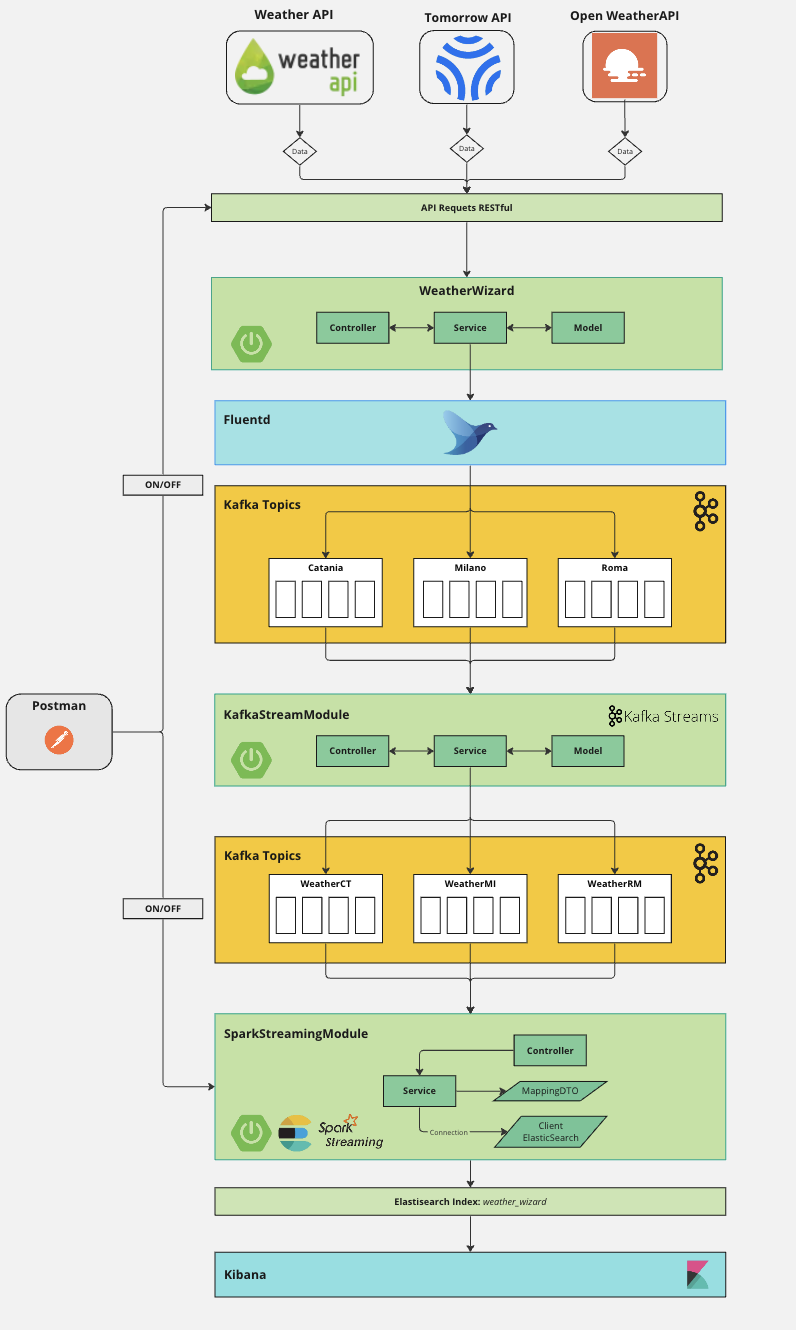

# API Reference
Di seguito vengono dettagliati le API di riferimento e utilizzati dal progetto:

### WeatherAPI

```http
  GET http://api.weatherapi.com/v1
```

| Parameter | Type     | Description                |
| :-------- | :------- | :------------------------- |
| `lang` | `string` | <**Optional**> Returns data field in API in the desired language  |
| `aqi` | `string` | <**Optional**> Enable/Disable Air Quality data in forecast API output  |
| `key` | `string` | <**Required**> API Key  |
| `q` | `string` | <**Required**> City name  |

### TomorrowAPI

```http
  GET http://api.openweathermap.org/geo/1.0/direct
```

```http
  GET https://api.openweathermap.org/data/2.5/weather
```

| Parameter | Type     | Description                       |
| :-------- | :------- | :-------------------------------- |
| `apikey`  | `string` | <**Required**> API Key            |
| `location`| `string` | <**Required**> City name          |


### OpenWeatherAPI

```http
  GET https://api.openweathermap.org/data/2.5/weather
```

| Parameter | Type     | Description                        |
| :-------- | :------- | :--------------------------------- |
| `lat`     | `string` | <**Required**> Latitude            |
| `lon`    | `string` | <**Required**> Longitude            |
| `appid`   | `string` | <**Required**> API Key             |
| `units`   | `string` | <**Optional**> Units of measurement|
| `lang`    | `string` | <**Optional**> Language of received data|

---

### Modulo: WeatherWizard
Il modulo iniziale del progetto, progettatto per essere anche un microservizio Springboot, è chiamato appunto WeatherWizard. 

La struttura del seguente modulo Springboot, e anche di quelli successivi, è gestita tramite l'implementazione di 3 componenti fondamentali:
- Controller: definito da classi che hanno lo scopo di raccogliere le richieste HTTP (all'interno del controller vi sono appunto le API del modulo)
- Service: la cui responsabilità principale è quella di implementare la logica di business del progetto
- Model: è parte del modulo in cui è definito l'accesso e la manipolazione ai dati.

#### Scopo del modulo
Il funzionamento alla base del modulo è quello di effettuare delle richieste HTTP alle API meteorologiche per poter ricevere le informazioni metereologiche necessarie alla pipeline.
Ognuna di queste richieste è autenticata tramite un token che permette di riconoscere il client che effettua la richiesta e di monitorare il numero di chiamate http effettuate.

### Fluentd
Una volta che i dati sono stati ricevuti dal modulo WeatherWizard, essi vengono inviati a fluentd che si occupera di riconoscere le informazioni sui dati (tramite le regole definite nel file di configurazione, e invierà i messaggi ai dovuti topic kafka, che sono:
- Catania
- Roma
- Milano

### KafkaStreamModule
Il secondo modulo, realizzato sempre tramite il framework SpringBoot, è stato implementato con la dipendenza di Kafka Stream per sfruttare la funzionalità di recepire i dati dai topic kafka, elaborare le informazioni mappandoli in un unico oggetto DTO, e inviando tale oggetto a ulteriori 3 Topic Kafka (in base alla città di riferimento):
- WeatherCT
- WeatherRM
- WeatherMI

### SparkStreamingModule
L'ultimo modulo Springboot, progettato anch'esso per essere un microservizio, è chiamato SparkStreamingModule.
Tale modulo sfrutta la tecnologia Apache Spark, un framework molto potente per l'elaborazione di una grande quantità di dati, capace anche integrare soluzioni di Machine Learning.
All'interno del modulo è stato sviluppato un processo schedulato capace di collegarsi ai topic Kafka, precedentemente specificati, prendere i dati in formato JSON e scriverli su un file csv, tutto sempre sfruttando Spark.

Inoltre, all'interno di tale modulo, viene effettuato il collegamento a Elasticsearch, creando un'indice 'weather_wizard' pronto per ricevere le informazioni elaborate e mappate.

Dopo aver scritto i dati sul file csv, dopo circa 5 secondi, viene eseguito il processo per leggere le informazioni dal file csv, mapparli in un oggetto compatibile con la struttura di Elasticsearch e inviati all'indice precedentemente creato. 

### Kibana
Infine, l'ultimo elemento della pipeline è quello di Kibana.
Tale tecnologia permette di visualizzare, tramite dei grafici appositi, le informazioni elaborate.
Un grafico di esempio che è stato creato con l'acquisizione e l'elaborazione dei dati è il seguente:
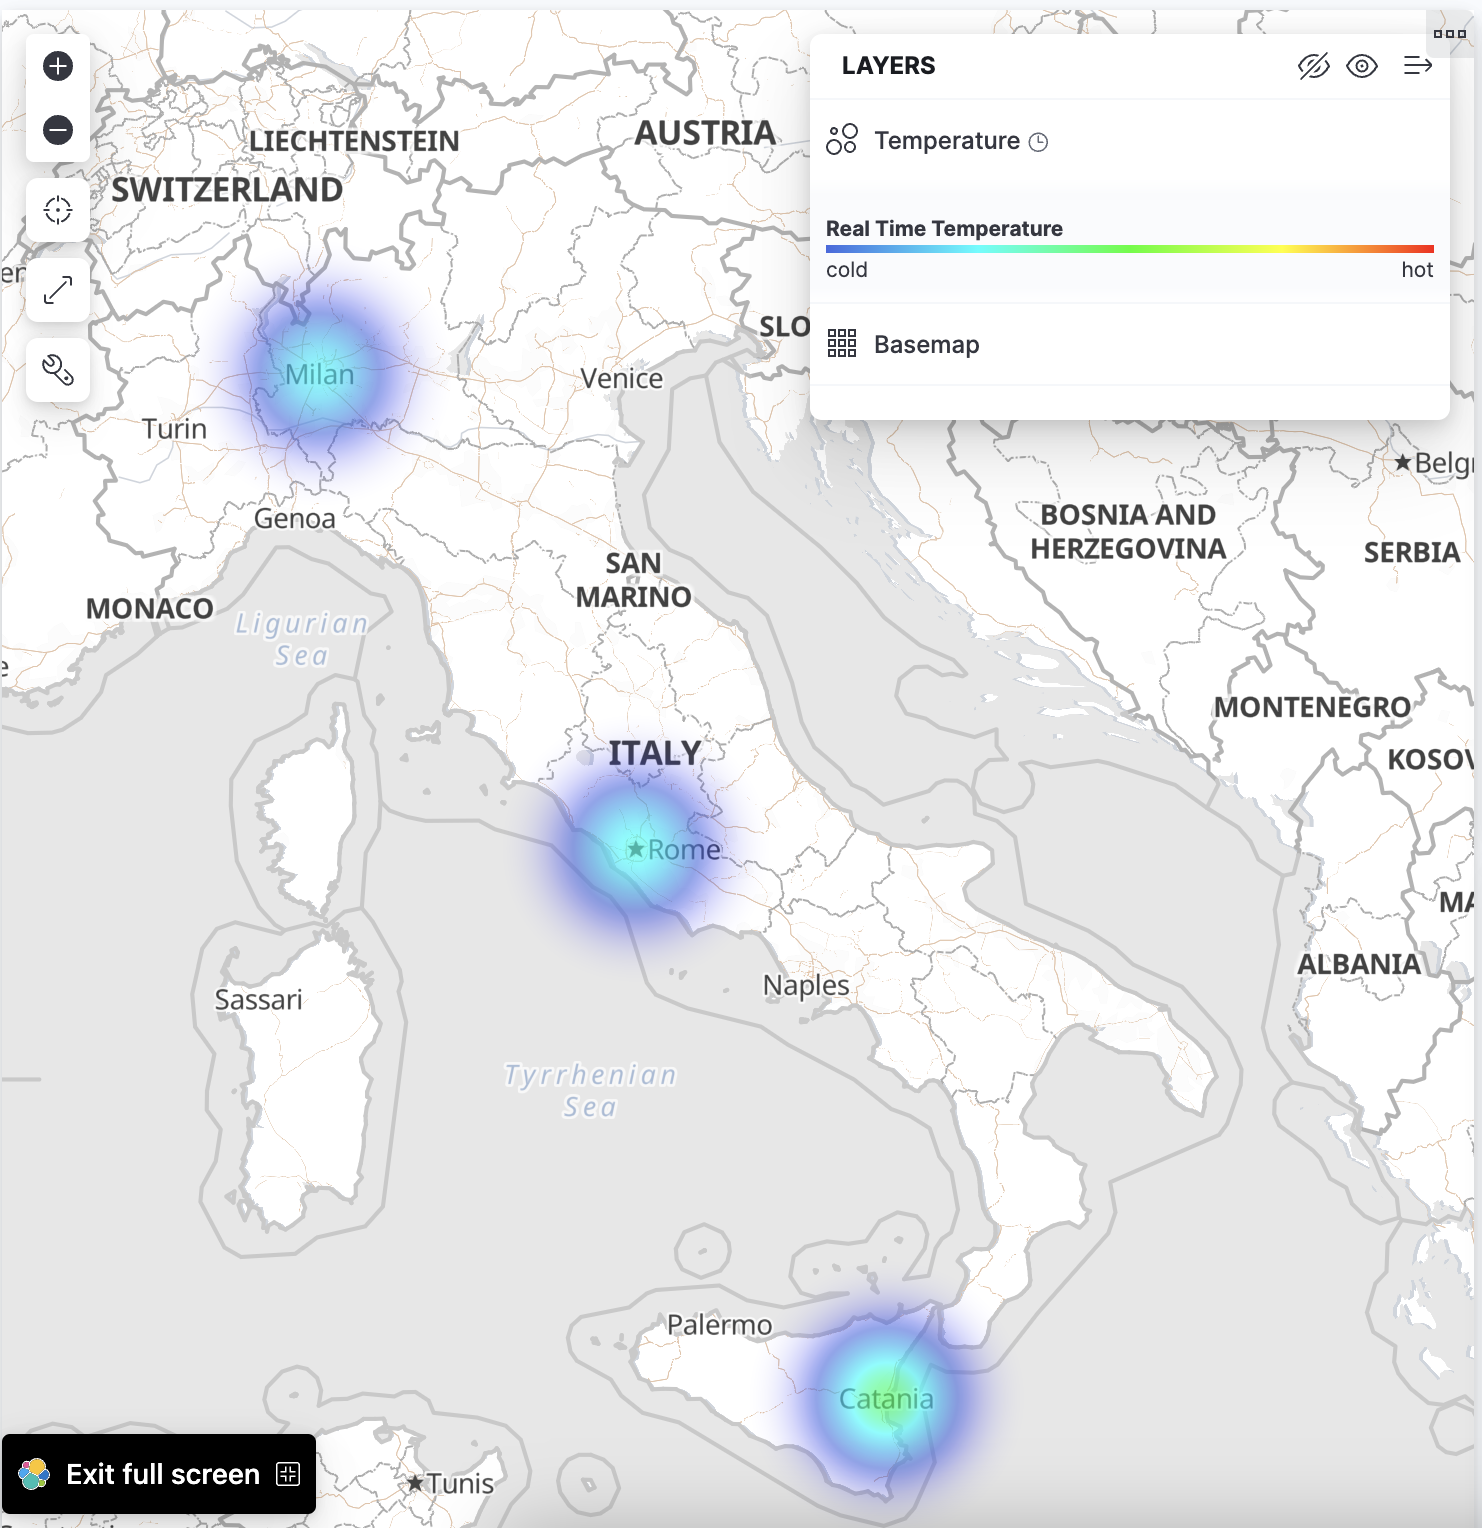

## Avvio della pipeline

Per poter eseguire la pipeline è necessario aver installato [Docker](https://www.docker.com/products/docker-desktop/)

È consigliato inoltre installare un software che permetta di effettuare delle chiamate http (si consiglia Postman o Insomnia).

⚠️ Attenzione, le successive operazioni devono essere necessariamente effettuate in sequenza affinché la pipeline funzioni senza errori.
Inoltre, è necessario possedere dei ```token``` di autenticazione personali provenienti dalle API metereologiche.
Tali token infatti, devono essere inseriti nel file ```application.properties``` del microservizio `WeatherWizard` e precisamente nelle seguenti proprietà:

|              Property                |         Service        | 
| :--------------------------------    | :--------------------- | 
|   `web.request.weatherapi.token`     |     `WeatherWizard`    | 
|   `web.request.tomorrowapi.token`    |     `WeatherWizard`    |
|   `web.request.openweatherapi.token` |     `WeatherWizard`    | 

Dopo aver installato Docker, deve essere lanciato il seguente comando:

```bash
docker compose up --d --build 
```
Questo comando permette di eseguire il file ***```compose.yml```*** che si occuperà di scaricare le immagini e costruire i container di ogni componente utili al corretto funzionamento della pipeline.

È consigliato monitorare i log di ogni container tramite il comando:

```bash
docker logs -f nome-container
```

---

Successivamente, dopo aver eseguito ogni container, è necessario creare i topic Kafka direttamente dal container kafka_server, eseguendo tale procedimento:
-	Dal terminale del container in questione eseguire i seguenti comandi:
```bash
    cd /opt/kafka/bin
    w_create_topics.sh
```
La shell permetterà la creazione di tutti i topic necessari alla pipeline.

Dopodiché si procede, rispettivamente, con l’avvio dei container ***```kafka_stream```*** e ***```spark_streaming```***

Infine, tramite Postman, si effettuano delle chiamate http verso localhost e rispettivamente ai seguenti URL:
#### WeatherWizard
```http
  PUT http://localhost:8080/v0/polling/activate
```

```http
  PUT http://localhost:8080/v0/polling/disable
```

#### SparkStreamingModule
```http
  POST http://localhost:8084/v0/spark/start
```

```http
  POST http://localhost:8084/v0/spark/stop
```

Per poi accedere al servizio di Kibana ```http://localhost:5601``` per configurare la dashboard a proprio piacimento.

## Author

- [Salvatore Piemonte](https://github.com/GingermanSP7)